In [ ]:
import pandas as pd

# Load data
df = pd.read_csv("data.csv")  # replace with actual path
print(df.head())

# Check class balance
print(df['Bankrupt?'].value_counts(normalize=True))

: 

In [13]:
df.dropna(inplace=True)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ✅ 1. Load your dataset (replace with your actual file name)
df = pd.read_csv("data.csv")  # example: "bankruptcy_data.csv"
print(df.head())  # optional: see first few rows

# ✅ 2. Prepare features and labels
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

# ✅ 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ✅ 4. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data loaded and preprocessed successfully!")

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# 2. Predict on the test set
y_pred = model.predict(X_test_scaled)

# 3. Evaluate the model
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧠 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.62      0.18      0.28        44

    accuracy                           0.97      1364
   macro avg       0.79      0.59      0.63      1364
weighted avg       0.96      0.97      0.96      1364


🧠 Confusion Matrix:
[[1315    5]
 [  36    8]]


In [7]:
from sklearn.ensemble import RandomForestClassifier

# Add class_weight='balanced' to give minority class more importance
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1320
           1       0.64      0.16      0.25        44

    accuracy                           0.97      1364
   macro avg       0.80      0.58      0.62      1364
weighted avg       0.96      0.97      0.96      1364

[[1316    4]
 [  37    7]]


In [8]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.42      0.59      0.49        44

    accuracy                           0.96      1364
   macro avg       0.70      0.78      0.73      1364
weighted avg       0.97      0.96      0.96      1364

[[1284   36]
 [  18   26]]


Matplotlib is building the font cache; this may take a moment.


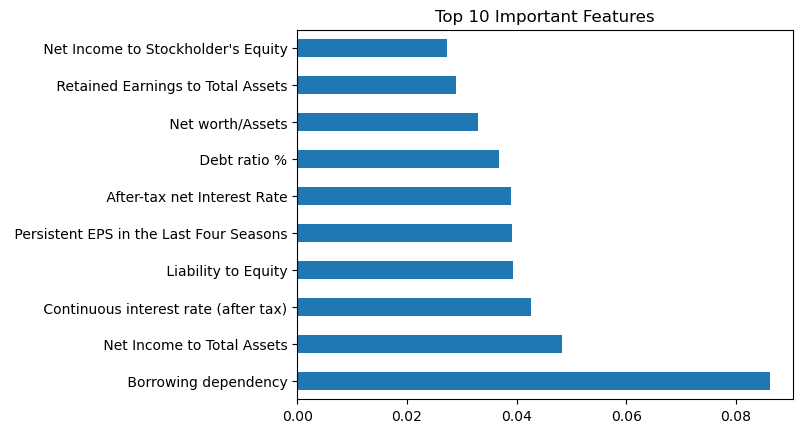

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()

In [14]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.42      0.59      0.49        44

    accuracy                           0.96      1364
   macro avg       0.70      0.78      0.73      1364
weighted avg       0.97      0.96      0.96      1364

[[1284   36]
 [  18   26]]


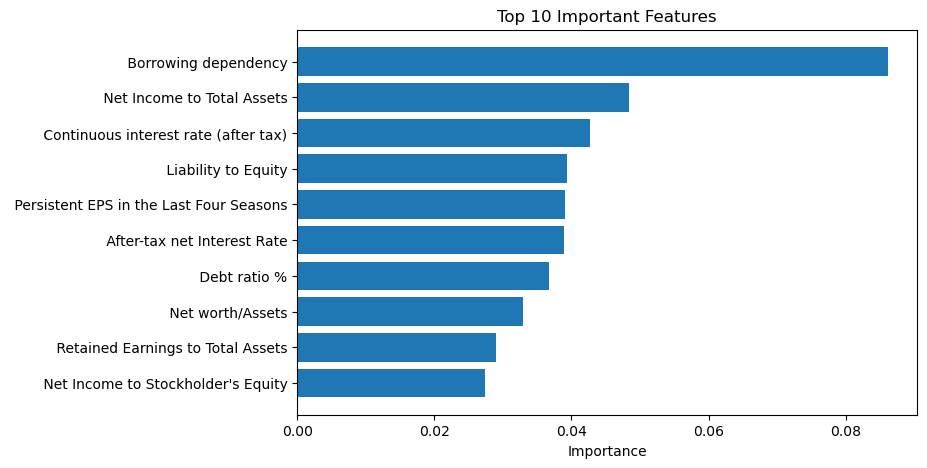

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train with balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Feature Importance
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10
features = X.columns[indices]

plt.figure(figsize=(8, 5))
plt.barh(features, importances[indices])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
# Just replace GridSearchCV with RandomizedSearchCV in the above setup

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,  # ✅ FIXED
    n_iter=20,             # Number of random combinations to try
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Show best parameters
print("✅ Best Parameters Found:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.8s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.9s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.9s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.8s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.9s
[CV] END class_weight=balanced_subsample, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   7.3s
[CV] END class_weight=balanced_subsample, max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   7.3

In [35]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧠 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1320
           1       0.42      0.59      0.49        44

    accuracy                           0.96      1364
   macro avg       0.70      0.78      0.73      1364
weighted avg       0.97      0.96      0.96      1364

🧠 Confusion Matrix:
 [[1284   36]
 [  18   26]]


In [37]:
import joblib
joblib.dump(best_model, "best_bankruptcy_model.pkl")


['best_bankruptcy_model.pkl']